Pandas, NumPy, Matplotlib, and Seaborn imported. OS module ready. Warnings suppressed.

Loading data from: /Users/aishwarya/breast-cancer-diagnosis/data/raw/wdbc.data
Data loaded successfully!
Dataset shape: (569, 32)

--- Initial Data Inspection ---

First 5 rows of the dataset:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.

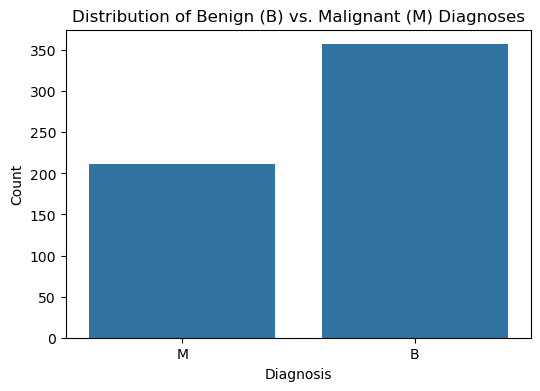


Initial data inspection complete. Data is ready for detailed EDA and preprocessing.


In [1]:
# notebooks/01_breast_cancer_diagnosis_eda.ipynb

# --- Section 1: Setup and Library Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys # For potential sys.exit()

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

print("Pandas, NumPy, Matplotlib, and Seaborn imported. OS module ready. Warnings suppressed.")

# --- Section 2: Load Data ---
# Define the local data file path (using absolute path for robustness)
data_filename = "wdbc.data"
# This constructs the path by going up from 'notebooks/' to the project root, then down into 'data/raw/'
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_filepath = os.path.join(project_root, "data", "raw", data_filename)

print(f"\nLoading data from: {data_filepath}")

# Check if the file exists before attempting to load
if not os.path.exists(data_filepath):
    print(f"Error: Data file not found at {data_filepath}. Please ensure 'wdbc.data' is in data/raw/.")
    sys.exit("Data loading failed. Exiting notebook execution.") # Exit cleanly if file not found

try:
    # Column names are not in the .data file, so we define them.
    # The dataset has an ID, then Diagnosis, then 30 features.
    # These feature names are standard for this dataset.
    features_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
    
    features_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se',
                   'smoothness_se', 'compactness_se', 'concavity_se',
                   'concave_points_se', 'symmetry_se', 'fractal_dimension_se']
    
    features_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                      'smoothness_worst', 'compactness_worst', 'concavity_worst',
                      'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
    
    # All columns in the order they appear in the file
    col_names = ['ID', 'Diagnosis'] + features_mean + features_se + features_worst
    
    # Load the CSV file. header=None because the file doesn't have a header row.
    df = pd.read_csv(data_filepath, header=None, names=col_names)
    
    print("Data loaded successfully!")
    print(f"Dataset shape: {df.shape}") # Expected (569, 32)

except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure 'wdbc.data' is correctly placed and not corrupted.")
    sys.exit("Data loading failed. Exiting notebook.") # Exit cleanly on other errors

# --- Section 3: Initial Data Inspection (EDA - Part 1) ---
print("\n--- Initial Data Inspection ---")

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Info (columns, non-null counts, dtypes):")
df.info()

print("\nDescriptive statistics of numerical features:")
print(df.describe())

# Check for missing values (beyond what .info() might show if they are non-standard)
print("\nMissing values count per column:")
print(df.isnull().sum())

# Drop the ID column as it's not a feature for modeling
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("\n'ID' column dropped.")

# Check the distribution of the target variable
print("\nDistribution of Diagnosis (Target Variable):")
print(df['Diagnosis'].value_counts())
print(df['Diagnosis'].value_counts(normalize=True)) # Percentage

# Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Benign (B) vs. Malignant (M) Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

print("\nInitial data inspection complete. Data is ready for detailed EDA and preprocessing.")